In [67]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pylab as plt

SMALL_SIZE = 14
MEDIUS_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUS_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

gammar = 5596.880474356758
betar  = 0.9999999840383441
frev   = 701268.8964089262
circum = 427.5
c = 3e8

# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [85]:
filename1 = 'output/PyORBIT_fitted.mat'
filename2 = 'output/PyORBIT_output.mat'

pyorbit1 = sio.loadmat(filename1, squeeze_me=True)
pyorbit2 = sio.loadmat(filename2, squeeze_me=True)

df_python = pd.read_parquet('output/IBS_output_python.parquet', engine='pyarrow')
df_blond  = pd.read_parquet('output/IBS_output_BLonD.parquet', engine='pyarrow')

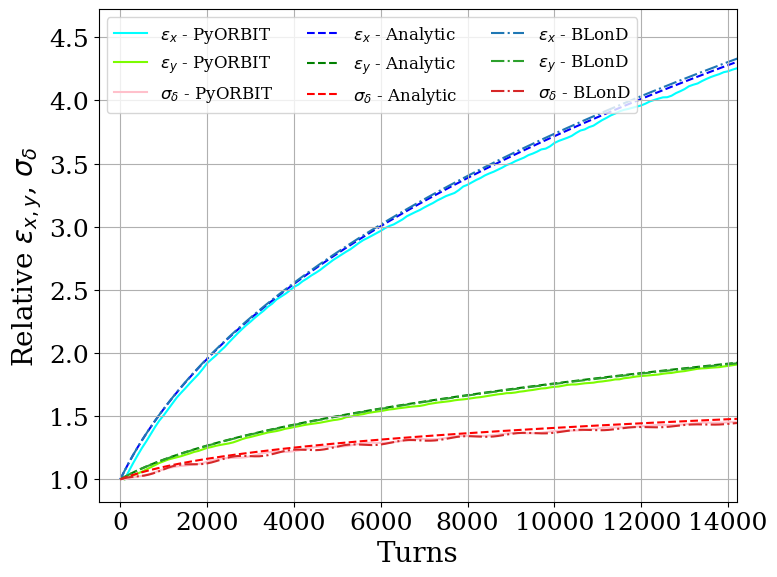

In [86]:
f, ax = plt.subplots(1, figsize=(8,6))

lns1 = ax.plot(pyorbit1['turn'][:14030], pyorbit1['eps_x'][:14030] / pyorbit1['eps_x'][0], 
        'cyan', label = r'$\varepsilon_x$ - PyORBIT', zorder = 1)

lns3 = ax.plot(pyorbit1['turn'][:14030], pyorbit1['eps_y'][:14030] / pyorbit1['eps_y'][0], 
        'lawngreen', label = r'$\varepsilon_y$ - PyORBIT', zorder = 1)

lns5 = ax.plot(pyorbit1['turn'][:14030],  pyorbit1['dpp'][:14030] / pyorbit1['dpp'][0], 
               'pink', label = r'$\sigma_{\delta}$ - PyORBIT', zorder = 9)



lns2 = ax.plot(df_python['time'] * frev, df_python['epsn_x'] / df_python['epsn_x'][0], 
               'blue', ls = '--', label = r'$\varepsilon_x$ - Analytic', zorder = 1)

lns4 = ax.plot(df_python['time'] * frev, df_python['epsn_y'] / df_python['epsn_y'][0], 
               'green', ls = '--', label = r'$\varepsilon_y$ - Analytic', zorder = 1)

lns6 = ax.plot(df_python['time'] * frev,  df_python['deltaE'] / df_python['deltaE'][0], 
               'red', ls = '--', label = r'$\sigma_{\delta}$ - Analytic', zorder = 9)


lns7 = ax.plot(df_blond['time'] * frev, df_blond['epsn_x'] / df_blond['epsn_x'][0], 
               'tab:blue', ls = '-.', label = r'$\varepsilon_x$ - BLonD', zorder = 1)

lns8 = ax.plot(df_blond['time'] * frev, df_blond['epsn_y'] / df_blond['epsn_y'][0], 
               'tab:green', ls = '-.', label = r'$\varepsilon_y$ - BLonD', zorder = 1)

lns9 = ax.plot(df_blond['time'] * frev,  df_blond['deltaE'] / df_blond['deltaE'][0], 
               'tab:red', ls = '-.', label = r'$\sigma_{\delta}$ - BLonD', zorder = 9)



ax.grid()
ax.set_xlim(-500, 14200)
ax.set_ylabel('Relative $\epsilon_{x,y}$, $\sigma_{\delta}$')
ax.set_xlabel('Turns')

lns = lns1 + lns3 + lns5 + lns2 + lns4 + lns6 + lns7+ lns8+ lns9
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, ncols = 3, fontsize = 12)

plt.tight_layout()
# plt.savefig('figures/relative_mean_emittance_evolution.png')

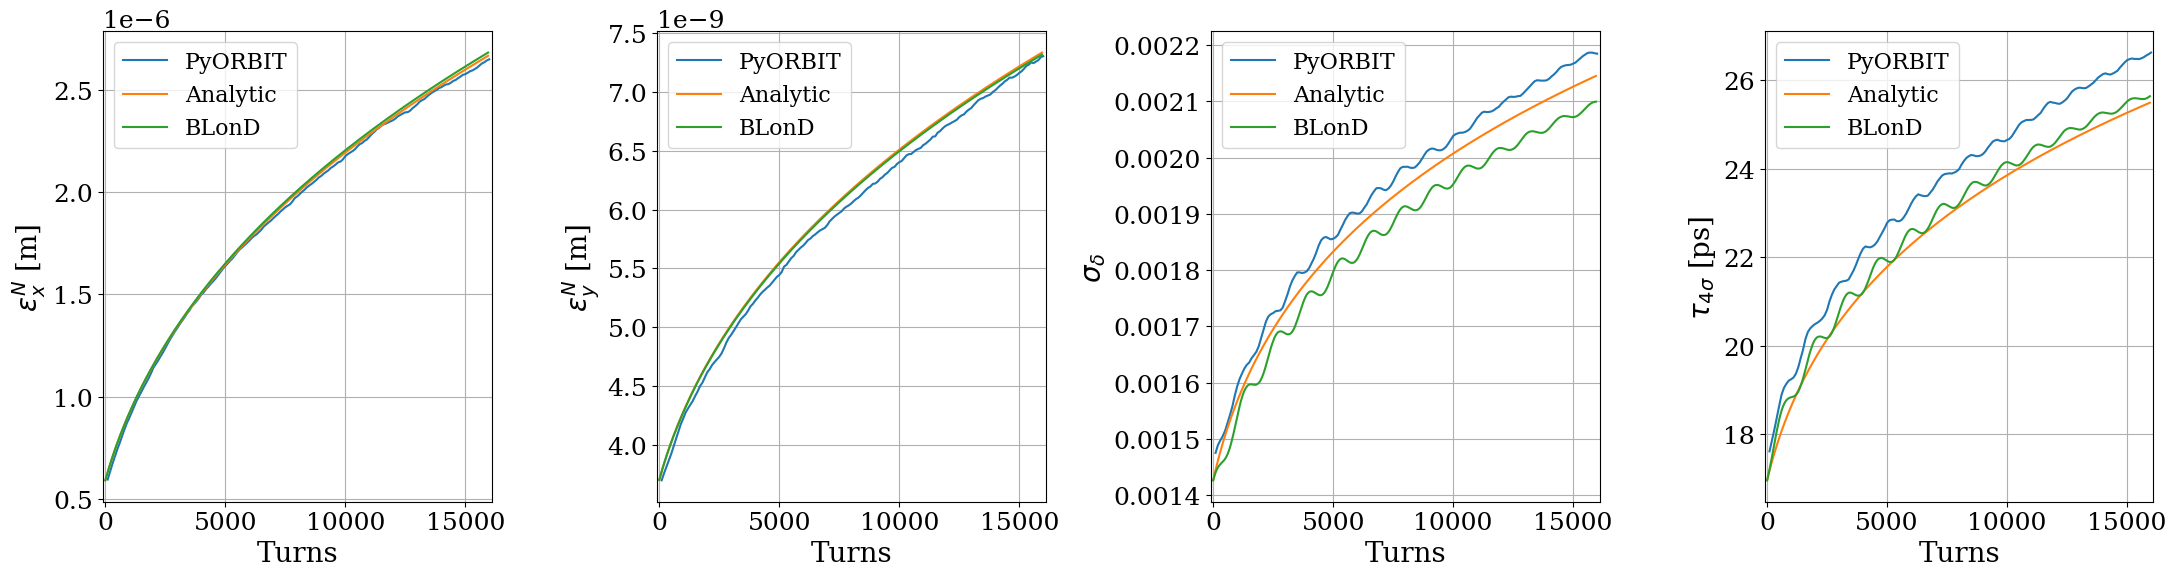

In [87]:
f, ax = plt.subplots(1, 4, figsize=(22,6))

ax[0].plot(pyorbit1['turn'], pyorbit1['eps_x'] * gammar, label = 'PyORBIT')
# ax[0].plot(pyorbit2['turn'], pyorbit2['eps_x'] * gammar, label = 'PyORBIT2')
ax[0].plot(df_python['time'] * frev, df_python['epsn_x'], label = 'Analytic')
ax[0].plot(df_blond['time'] * frev, df_blond['epsn_x'], label = 'BLonD')


ax[1].plot(pyorbit1['turn'], pyorbit1['eps_y'] * gammar, label = 'PyORBIT')
# ax[1].plot(pyorbit2['turn'], pyorbit2['eps_y'] * gammar, label = 'PyORBIT2')
ax[1].plot(df_python['time'] * frev, df_python['epsn_y'], label = 'Analytic')
ax[1].plot(df_blond['time'] * frev, df_blond['epsn_y'], label = 'BLonD')

ax[2].plot(pyorbit1['turn'],  pyorbit1['dpp'], label = 'PyORBIT')
# ax[2].plot(pyorbit2['turn'],  pyorbit2['dpp_rms'], label = 'PyORBIT2')
ax[2].plot(df_python['time'] * frev, df_python['deltaE'], label = 'Analytic')
ax[2].plot(df_blond['time'] * frev,  df_blond['deltaE'], label = 'BLonD')


ax[3].plot(pyorbit1['turn'],  pyorbit1['bunchlength'] * 4 / c * 1e12, label = 'PyORBIT')
# ax[3].plot(pyorbit2['turn'],  pyorbit2['bunchlength'], label = 'PyORBIT2')
ax[3].plot(df_python['time'] * frev, df_python['tau_ns']* 1e12, label = 'Analytic')
ax[3].plot(df_blond['time'] * frev,  df_blond['tau_ns']* 1e12, label = 'BLonD')

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlim(-100, 16100)
    ax[i].set_xlabel('Turns')

ax[0].set_ylabel(r'$\varepsilon^N_x$ [m]')
ax[1].set_ylabel(r'$\varepsilon^N_y$ [m]')
ax[2].set_ylabel(r'$\sigma_\delta$')
ax[3].set_ylabel(r'$\tau_{4\sigma}$ [ps]')

f.tight_layout()
plt.savefig('figures/emittance_evolution_gaussian.png')


In [81]:
# print(f"{pyorbit2['eps_x'][0] * gammar * betar:.10e}, {pyorbit2['eps_y'][0] * gammar * betar:.10e}, {pyorbit2['dpp_rms'][0]:.10f},", 
#       f"{pyorbit2['bunchlength'][0]:.10e}, {pyorbit2['bunchlength_rms_m'][0]:.10f}")

print(f"{pyorbit1['eps_x'][0] * gammar * betar:.10e}, {pyorbit1['eps_y'][0] * gammar * betar:.10e}, {pyorbit1['dpp'][0]:.10f},", 
      f"{pyorbit1['bunchlength'][0] / c / betar * 4:.10e}, {pyorbit1['bunchlength'][0]:.10f}")

print(f"{df_python['epsn_x'][0]:.10e}, {df_python['epsn_y'][0]:.10e}, {df_python['deltaE'][0] / betar**2:.10f},",
      f"{df_python['tau_ns'][0]:.10e}, {df_python['tau_ns'][0] * c * betar / 4:.10f}")

print(f"{df_blond['epsn_x'][0]:.10e}, {df_blond['epsn_y'][0]:.10e}, {df_blond['deltaE'][0] / betar**2:.10f},",
      f"{df_blond['tau_ns'][0]:.10e}, {df_blond['tau_ns'][0] * c * betar / 4:.10f}")

5.9392757878e-07, 3.6961862315e-09, 0.0014748188, 1.7604177505e-11, 0.0013203133
5.9000000000e-07, 3.7000000000e-09, 0.0014634488, 1.7392718346e-11, 0.0013044539
5.9000000000e-07, 3.7000000000e-09, 0.0014634488, 1.7392718346e-11, 0.0013044539


In [5]:
df_python


,time,epsn_x,epsn_y,tau_ns,deltaE
0,0.000000,5.900000e-07,3.700000e-09,1.728722e-11,0.001475
1,0.000071,6.097257e-07,3.735645e-09,1.738926e-11,0.001484
2,0.000143,6.288620e-07,3.770199e-09,1.748748e-11,0.001492
3,0.000214,6.474551e-07,3.803748e-09,1.758220e-11,0.001501
4,0.000285,6.655457e-07,3.836368e-09,1.767372e-11,0.001508
...,...,...,...,...,...
315,0.022459,2.623572e-06,7.307285e-09,2.540825e-11,0.002168
316,0.022531,2.627080e-06,7.313453e-09,2.541972e-11,0.002169
317,0.022602,2.630580e-06,7.319609e-09,2.543116e-11,0.002170
318,0.022673,2.634075e-06,7.325753e-09,2.544258e-11,0.002171


In [8]:
import matplotlib

In [10]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


In [35]:

pyorbit1['bunchlength'] / c * 4


array([1.76041772e-11, 1.78503798e-11, 1.80913826e-11, 1.83612649e-11,
       1.86241024e-11, 1.88827979e-11, 1.90383674e-11, 1.91314281e-11,
       1.92048287e-11, 1.92360991e-11, 1.92758776e-11, 1.93617611e-11,
       1.95101351e-11, 1.97153118e-11, 1.99084343e-11, 2.01511606e-11,
       2.03067970e-11, 2.03902709e-11, 2.04434522e-11, 2.04863496e-11,
       2.05172383e-11, 2.05583126e-11, 2.06117342e-11, 2.06843866e-11,
       2.08091481e-11, 2.09985623e-11, 2.11482612e-11, 2.12693881e-11,
       2.13476953e-11, 2.14222923e-11, 2.14442053e-11, 2.14590363e-11,
       2.14651468e-11, 2.14966794e-11, 2.15960525e-11, 2.16949014e-11,
       2.18200193e-11, 2.19612099e-11, 2.20908821e-11, 2.21930121e-11,
       2.22420714e-11, 2.22275069e-11, 2.22225496e-11, 2.22447278e-11,
       2.22878893e-11, 2.23602091e-11, 2.24588172e-11, 2.25580412e-11,
       2.26578049e-11, 2.27760127e-11, 2.28338711e-11, 2.28482258e-11,
       2.28516173e-11, 2.28151034e-11, 2.28127580e-11, 2.28391369e-11,
      